In [ ]:
# import your Python packages here
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# 1. Feature Engineering for _Environmental Sensor Telemetry Data_

## Problem 1.1

### (a)

This is an unsupervised ML task as the dataset does not include labels of when people are recorded to be near the iot device.

### (b)

In [ ]:
iot_df = pd.read_csv("iot_telemetry_dataset.csv")
print("Number of data samples:", iot_df.shape[0])

Number of data samples: 405184


### (c)



In [ ]:
counter = 0
for index, value in iot_df.device.items():
  if value == "00:0f:00:70:91:0a":
    counter += 1
print("Samples with device address 00:0f:00:70:91:0a --", counter)

Samples with device address 00:0f:00:70:91:0a -- 111815


### (d)

In [ ]:
counter = 0
for index, value in iot_df.device.items():
  if value == "1c:bf:ce:15:ec:4d":
    counter += 1
print("Samples with device address 1c:bf:ce:15:ec:4d --", counter)

Samples with device address 1c:bf:ce:15:ec:4d -- 105918


### (e)

In [ ]:
counter = 0
for index, value in iot_df.device.items():
  if value == "b8:27:eb:bf:9d:51":
    counter += 1
print("Samples with device address b8:27:eb:bf:9d:51 --", counter)

Samples with device address b8:27:eb:bf:9d:51 -- 187451


## Problem 1.2

### (a)

In [ ]:
iot_df = iot_df.join(pd.get_dummies(iot_df.pop('device')))

light = pd.get_dummies(iot_df.pop('light'))
iot_df.insert(loc = len(iot_df.columns), column='light_false', value=light.get(0))
iot_df.insert(loc = len(iot_df.columns), column='light_true', value=light.get(1))

motion = pd.get_dummies(iot_df.pop('motion'))
iot_df.insert(loc = len(iot_df.columns), column='motion_false', value=motion.get(0))
iot_df.insert(loc = len(iot_df.columns), column='motion_true', value=motion.get(1))

### (b)

In [ ]:
## dev 00:0f:00:70:91:0a
dev = iot_df.loc[iot_df['00:0f:00:70:91:0a'] == 1]
dev1_co_mean = dev.co.mean()
dev1_co_std = dev.co.std()
for i in range(len(iot_df.co)):
  if iot_df['00:0f:00:70:91:0a'][i] == 1:
    iot_df.co[i] = (iot_df['co'][i] - dev1_co_mean) / dev1_co_std
dev1_humidity_mean = dev.humidity.mean()
dev1_humidity_std = dev.humidity.std()
for i in range(len(iot_df.humidity)):
  if iot_df['00:0f:00:70:91:0a'][i] == 1:
    iot_df.humidity[i] = (iot_df['humidity'][i] - dev1_humidity_mean) / dev1_humidity_std
dev1_lpg_mean = dev.lpg.mean()
dev1_lpg_std = dev.lpg.std()
for i in range(len(iot_df.lpg)):
  if iot_df['00:0f:00:70:91:0a'][i] == 1:
    iot_df.lpg[i] = (iot_df['lpg'][i] - dev1_lpg_mean) / dev1_lpg_std
dev1_smoke_mean = dev.smoke.mean()
dev1_smoke_std = dev.smoke.std()
for i in range(len(iot_df.smoke)):
  if iot_df['00:0f:00:70:91:0a'][i] == 1:
    iot_df.smoke[i] = (iot_df['smoke'][i] - dev1_smoke_mean) / dev1_smoke_std
dev1_temp_mean = dev.temp.mean()
dev1_temp_std = dev.temp.std()
for i in range(len(iot_df.temp)):
  if iot_df['00:0f:00:70:91:0a'][i] == 1:
    iot_df.temp[i] = (iot_df['temp'][i] - dev1_temp_mean) / dev1_temp_std

## dev 1c:bf:ce:15:ec:4d
dev = iot_df.loc[iot_df['1c:bf:ce:15:ec:4d'] == 1]
dev2_co_mean = dev.co.mean()
dev2_co_std = dev.co.std()
for i in range(len(iot_df.co)):
  if iot_df['1c:bf:ce:15:ec:4d'][i] == 1:
    iot_df.co[i] = (iot_df['co'][i] - dev2_co_mean) / dev2_co_std
dev2_humidity_mean = dev.humidity.mean()
dev2_humidity_std = dev.humidity.std()
for i in range(len(iot_df.humidity)):
  if iot_df['1c:bf:ce:15:ec:4d'][i] == 1:
    iot_df.humidity[i] = (iot_df['humidity'][i] - dev2_humidity_mean) / dev2_humidity_std
dev2_lpg_mean = dev.lpg.mean()
dev2_lpg_std = dev.lpg.std()
for i in range(len(iot_df.lpg)):
  if iot_df['1c:bf:ce:15:ec:4d'][i] == 1:
    iot_df.lpg[i] = (iot_df['lpg'][i] - dev2_lpg_mean) / dev2_lpg_std
dev2_smoke_mean = dev.smoke.mean()
dev2_smoke_std = dev.smoke.std()
for i in range(len(iot_df.smoke)):
  if iot_df['1c:bf:ce:15:ec:4d'][i] == 1:
    iot_df.smoke[i] = (iot_df['smoke'][i] - dev2_smoke_mean) / dev2_smoke_std
dev2_temp_mean = dev.temp.mean()
dev2_temp_std = dev.temp.std()
for i in range(len(iot_df.temp)):
  if iot_df['1c:bf:ce:15:ec:4d'][i] == 1:
    iot_df.temp[i] = (iot_df['temp'][i] - dev2_temp_mean) / dev2_temp_std

## dev b8:27:eb:bf:9d:51
dev = iot_df.loc[iot_df['b8:27:eb:bf:9d:51'] == 1]
dev3_co_mean = dev.co.mean()
dev3_co_std = dev.co.std()
for i in range(len(iot_df.co)):
  if iot_df['b8:27:eb:bf:9d:51'][i] == 1:
    iot_df.co[i] = (iot_df['co'][i] - dev3_co_mean) / dev3_co_std
dev3_humidity_mean = dev.humidity.mean()
dev3_humidity_std = dev.humidity.std()
for i in range(len(iot_df.humidity)):
  if iot_df['b8:27:eb:bf:9d:51'][i] == 1:
    iot_df.humidity[i] = (iot_df['humidity'][i] - dev3_humidity_mean) / dev3_humidity_std
dev3_lpg_mean = dev.lpg.mean()
dev3_lpg_std = dev.lpg.std()
for i in range(len(iot_df.lpg)):
  if iot_df['b8:27:eb:bf:9d:51'][i] == 1:
    iot_df.lpg[i] = (iot_df['lpg'][i] - dev3_lpg_mean) / dev3_lpg_std
dev3_smoke_mean = dev.smoke.mean()
dev3_smoke_std = dev.smoke.std()
for i in range(len(iot_df.smoke)):
  if iot_df['b8:27:eb:bf:9d:51'][i] == 1:
    iot_df.smoke[i] = (iot_df['smoke'][i] - dev3_smoke_mean) / dev3_smoke_std
dev3_temp_mean = dev.temp.mean()
dev3_temp_std = dev.temp.std()
for i in range(len(iot_df.temp)):
  if iot_df['b8:27:eb:bf:9d:51'][i] == 1:
    iot_df.temp[i] = (iot_df['temp'][i] - dev3_temp_mean) / dev3_temp_std


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWith

### (c)

In [ ]:
# your code for 1.2c goes here
print(iot_df.head(20))

              ts        co  humidity  ...  light_true  motion_false  motion_true
0   1.594512e+09 -1.080793  0.098428  ...           0             1            0
1   1.594512e+09 -0.464451  0.281222  ...           0             1            0
2   1.594512e+09 -1.044864  0.045488  ...           0             1            0
3   1.594512e+09  0.687051  1.664629  ...           1             1            0
4   1.594512e+09 -1.060344  0.045488  ...           0             1            0
5   1.594512e+09  0.649527  1.787605  ...           1             1            0
6   1.594512e+09 -1.044841  0.045488  ...           0             1            0
7   1.594512e+09 -0.398156  0.281222  ...           0             1            0
8   1.594512e+09  0.507419  1.787605  ...           1             1            0
9   1.594512e+09 -1.055167  0.045488  ...           0             1            0
10  1.594512e+09 -1.073150  0.045488  ...           0             1            0
11  1.594512e+09  0.624684  

### (d)

The timestamp variable wasn't touched during preprocessing because it is an independent variable that has nothing to do with whether a person is standing near the device or not.

### (e)

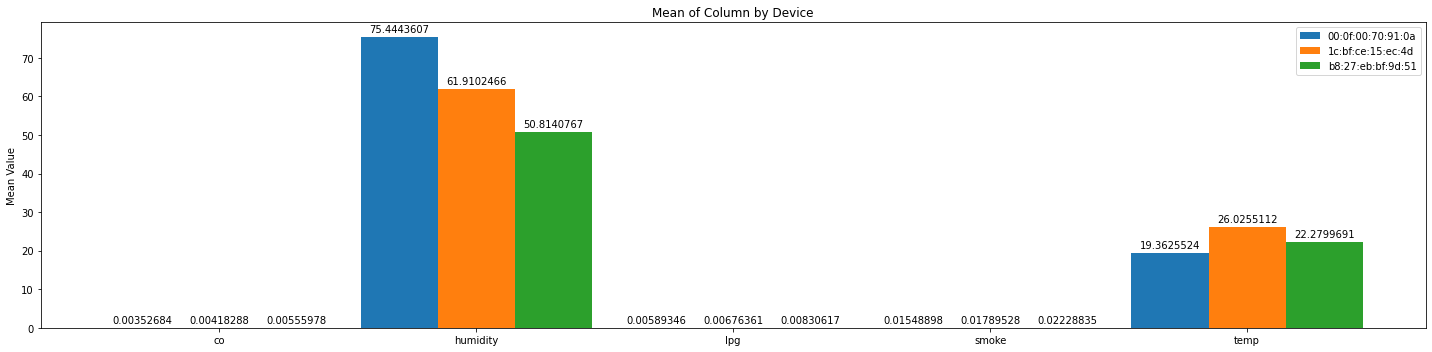

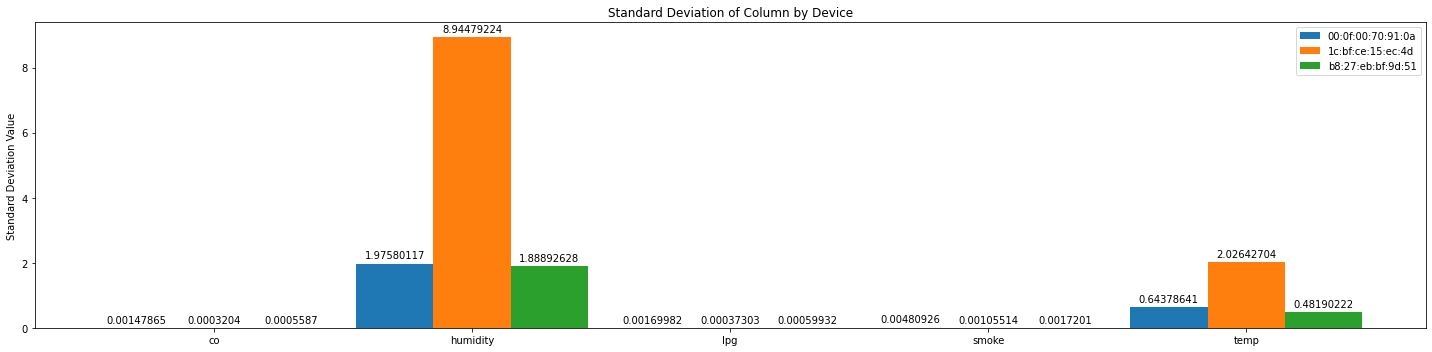

In [ ]:
labels = ['co', 'humidity', 'lpg', 'smoke', 'temp']
dev1 = [dev1_co_mean, dev1_humidity_mean, dev1_lpg_mean, dev1_smoke_mean, dev1_temp_mean]
dev2 = [dev2_co_mean, dev2_humidity_mean, dev2_lpg_mean, dev2_smoke_mean, dev2_temp_mean]
dev3 = [dev3_co_mean, dev3_humidity_mean, dev3_lpg_mean, dev3_smoke_mean, dev3_temp_mean]
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/3, dev1, width, label='00:0f:00:70:91:0a')
rects2 = ax.bar(x, dev2, width, label='1c:bf:ce:15:ec:4d')
rects3 = ax.bar(x + 3*width/3, dev3, width, label='b8:27:eb:bf:9d:51')
ax.set_ylabel('Mean Value')
ax.set_title('Mean of Column by Device')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = float(str(rect.get_height())[0:10])
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.set_size_inches(20,5)
fig.tight_layout()
plt.show()

dev1 = [dev1_co_std, dev1_humidity_std, dev1_lpg_std, dev1_smoke_std, dev1_temp_std]
dev2 = [dev2_co_std, dev2_humidity_std, dev2_lpg_std, dev2_smoke_std, dev2_temp_std]
dev3 = [dev3_co_std, dev3_humidity_std, dev3_lpg_std, dev3_smoke_std, dev3_temp_std]
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/3, dev1, width, label='00:0f:00:70:91:0a')
rects2 = ax.bar(x, dev2, width, label='1c:bf:ce:15:ec:4d')
rects3 = ax.bar(x + 3*width/3, dev3, width, label='b8:27:eb:bf:9d:51')
ax.set_ylabel('Standard Deviation Value')
ax.set_title('Standard Deviation of Column by Device')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = float(str(rect.get_height())[0:10])
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.set_size_inches(20,5)
fig.tight_layout()
plt.show()

## Problem 1.3

In [ ]:
features = pd.DataFrame()
z = iot_df.loc[:, 'co':'temp']
mean = z.mean(axis=1)
var = z.var(axis=1)
kurtosis = sps.kurtosis(z.loc[:, :], axis=1)
skew = sps.skew(z.loc[:, :], axis=1)
features.insert(0, 'mean', mean)
features.insert(1, 'var', var)
features.insert(2, 'kurtosis', kurtosis)
features.insert(3, 'skew', skew)
print(features.head(40))    

        mean       var  kurtosis      skew
0  -0.459101  0.817552 -1.268521  0.673607
1  -0.115558  0.231202 -1.626008  0.504156
2  -0.489104  0.641322 -1.365727  0.626984
3   0.844690  0.218513  0.083334  1.347752
4  -0.498619  0.654782 -1.374738  0.622674
5   0.846887  0.282264  0.157954  1.420887
6  -0.489090  0.641303 -1.365713  0.626990
7  -0.072678  0.195721 -1.589427  0.520788
8   0.761968  0.328947  0.246717  1.497492
9  -0.495437  0.650264 -1.371752  0.624102
10 -0.506492  0.666034 -1.382010  0.619199
11  0.834288  0.294919  0.183826  1.444486
12 -0.493908  0.648100 -1.370308  0.624793
13  0.961717  0.243553 -0.128798  1.093696
14 -0.501698  0.659171 -1.377603  0.621305
15 -0.107374  0.190740 -1.347891  0.635259
16 -0.489136  0.641367 -1.365758  0.626969
17 -0.506492  0.666034 -1.382010  0.619199
18  0.936841  0.245922 -0.064982  1.178371
19 -0.510993  0.672513 -1.386094  0.617248
20 -0.092923  0.179858 -1.320541  0.648137
21  0.846887  0.282264  0.157954  1.420887
22 -0.52641

# 2. Feature Learning for _Synthetically Generated Data_

## Problem 2.1

### (a)

In [209]:
matrix = np.random.randn(3, 2)
print(matrix)

[[ 0.19854986  0.29228004]
 [ 0.75068107  1.96341143]
 [-1.37134154 -0.3854566 ]]


### (b)

In [210]:
print("rank =", np.linalg.matrix_rank(matrix))

rank = 2


### (c)

In [211]:
for col in range(2):
  print("norm of col", col, ":", np.linalg.norm(matrix[:,col]))
a = np.squeeze(np.asarray(matrix[:,0]))
b = np.squeeze(np.asarray(matrix[:,1]))
print("inner product:", np.inner(a, b))

norm of col 0 : 1.5759193337978847
norm of col 1 : 2.0221248402789067
inner product: 2.060520608377821


(d)

In [212]:
q, r = np.linalg.qr(matrix)
v1 = np.squeeze(np.asarray(q[:,0]))
v2 = np.squeeze(np.asarray(q[:,1]))
v3 = v1 + v2
print("v1:", v1)
print("v2:", v2)
print("v3:", v3)

v1: [-0.12598986 -0.47634486  0.87018511]
v2: [-0.082687   -0.86908002 -0.48771177]
v3: [-0.20867686 -1.34542488  0.38247334]


## Problem 2.2

### (a) && (c)

In [213]:
data_matrix = np.zeros((250, 3))
for i in range(250):
  b = np.random.randn(2, 1)
  x = np.matmul(matrix, b)
  data_matrix[i] = np.squeeze(x)
print("n is 250, p is 3")
print("Dimensionality of X:", np.shape(data_matrix))


n is 250, p is 3
Dimensionality of X: (250, 3)


### (b)

Yes, all the created samples lie in the span of S as the can be written as linear combinations of the vectors of A.

### (d)

In [214]:
print(np.linalg.matrix_rank(data_matrix))

2


## Problem 2.3

### (a)

In [215]:
u, s, vh = np.linalg.svd(data_matrix)
w, v = np.linalg.eig(np.matmul(np.transpose(data_matrix), data_matrix))
print("### right singular vectors ###")
print(np.transpose(vh))
print("### eigenvectors ###")
print(v)


### right singular vectors ###
[[ 0.15048571 -0.00803974  0.98857949]
 [ 0.8986619   0.41786516 -0.13339974]
 [-0.41202043  0.90847348  0.07010774]]
### eigenvectors ###
[[ 0.15048571  0.98857949 -0.00803974]
 [ 0.8986619  -0.13339974  0.41786516]
 [-0.41202043  0.07010774  0.90847348]]


The right singular vectors of X and eigenvectors of X'X do match up but they are out of order. Additionally, some of the vectors share opposite signs as the singular values are non negative values.


In [216]:
print("### eigenvalues ###")
print(w)
print("### singular values (squared) ###")
s2 = np.power(s, 2)
print(s2)

### eigenvalues ###
[1.54767081e+03 5.10216869e-14 2.22633862e+02]
### singular values (squared) ###
[1.54767081e+03 2.22633862e+02 7.99567261e-30]


The eigenvalues of X'X and singular values (squared) of X do match, except for one value (in each set) which are both so close to zero that they are considered equal to zero.

In [217]:
print("sum: ", np.sum(s2))
print("energy: ", np.power(np.linalg.norm(data_matrix), 2))

sum:  1770.3046689443454
energy:  1770.3046689443465


### (b)

#### (i)

In [218]:
print(s)

[3.93404475e+01 1.49209203e+01 2.82766204e-15]


The last singular value should be zero but appears as a very, very small number due to rounding errors in the calculation of singular value decomposition of the matrix, since floats are not exact representations of the numbers they are intended to represent. 

#### (ii)

The right singular row vectors are the eigenvectors of X'X, and the singular values are the non-negative square root of the eigenvalues of X'X. The right singular vectors are the "axes" for which the linear transformation matrix A acts, or in other words they are "axes" for the subspace S.

## Problem 2.4


### (a)

Since all the data samples in X were created as linear combinations of the 2 linearly independent vectors of matrix A, we should only need 2 principal components to capture 

### (b)

#### (i)

$$E[x_k] = [E[x_{k,0}], E[x_{k,1}],E[x_{k,2}]]$$
Since each $x_{k,i}$ is an IID random variable with an expected value of zero:
$$E[x_k] = 0$$

#### (ii)

In [220]:
print(np.mean(data_matrix, axis=1))

[-1.16346374e+00  2.41732887e-01  2.29234880e-01 -4.93403834e-01
  5.44701177e-01  7.80135524e-02  5.64601903e-01 -4.25658760e-01
  6.15509450e-03  3.19449269e-01  3.94301069e-01 -3.08590899e-01
  3.32630226e-01 -1.88904691e-01 -2.16441163e-01 -7.24775844e-02
 -8.90232490e-02  5.73236872e-01 -2.96185424e-01  1.55780947e+00
  4.03490485e-01  6.06065426e-01  2.81117809e-02  3.78063242e-02
 -1.10596382e+00 -1.07904382e+00 -8.00243665e-01  4.99728152e-01
 -1.60022090e+00  2.61066381e-01 -6.37772376e-01 -2.63314130e-01
  4.05516064e-01  5.52994569e-01 -1.25962106e-02 -5.49426714e-01
 -1.88426630e-01 -3.06147778e-01 -4.03336307e-01 -1.10179395e+00
 -3.06261975e-01 -8.96896636e-01 -4.22240337e-01 -5.35642166e-01
  8.99046248e-02  2.48489865e-01  4.95689598e-01  3.58286793e-02
 -8.01787702e-01  4.61559908e-01 -4.68185007e-01 -7.45128211e-02
  1.99459800e-01 -5.74374184e-01 -5.62161554e-01  1.34113708e+00
  2.84139514e-01  5.50527302e-01 -2.44128872e-01 -4.79678606e-02
  2.09062846e-01 -3.07927

### (c)

In [221]:
scopy = s
max1index = np.argmax(scopy)
u1 = np.transpose(vh)[:, max1index]
scopy[max1index] = -9999999999
max2index = np.argmax(scopy)
u2 = np.transpose(vh)[:, max2index]
print("u1:", u1)
print("u2:", u2)

u1: [ 0.15048571  0.8986619  -0.41202043]
u2: [-0.00803974  0.41786516  0.90847348]


### (d)

In [222]:
u = np.matrix([u1, u2])
features = np.transpose(np.matmul(u, np.transpose(data_matrix)))

### (e)

In [223]:
original = np.matmul(features, u)

### (f)

In [224]:
error = np.power(np.linalg.norm(original - data_matrix), 2)
print("Error:", error)

Error: 4.673803382852096e-28


### (g)

In [225]:
u_new = np.zeros((3,2))
u_new[:, 0] = u1
features_new = np.matmul(data_matrix, u_new)

### (h)

In [226]:
original_new = np.matmul(features_new, np.transpose(u_new))

### (i)

In [227]:
error_new = np.power(np.linalg.norm(original_new - data_matrix), 2)
print("Error:", error_new)
print("Second largest singular value of X:", np.power(s[max2index], 2))

Error: 222.63386166506973
Second largest singular value of X: 222.63386166506976


### (j)

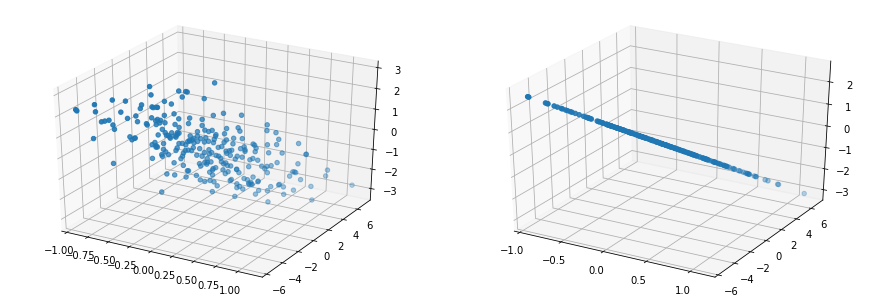

In [230]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection = '3d')
ax1.scatter(data_matrix[:, 0], data_matrix[:, 1], data_matrix[:, 2])
ax2 = fig.add_subplot(122, projection = '3d')
ax2.scatter(original_new[:, 0], original_new[:, 1], original_new[:, 2])
plt.subplots_adjust(0, 0, 2, 1, 0.1, 0)
plt.show()


The 2nd plot shows what looks like a "linearized" model  of the 1st scatterplot. We use PCA to map entries of our data matrix to a smaller k-subspace using its principal component, in this case mapping from a plane to a line.